In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("/content/drive/My Drive/AAIC/")
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 amazon1.png				    Ensemble.html
 amazon3.png				    Ensemble.ipynb
 amazon4.png				   'F:\GM1.dot'
'Amazon Fine Food Reviews Analysis.ipynb'   final_features_test_data.csv
 amazon.png				    final_features_train_data.csv
 Amz30kTest				    google_w2v_for_amazon.pkl
 amz4.png				    Quora
 Amz70kTrain				   'Quora_Assignment (1).ipynb'
 Corrected_DT.html			    Quora_Assignment.html
 Corrected_DT.ipynb			    Quora_Assignment.ipynb
 corrected_dt.py			    Quora_Assignment_Resub.html
 data					    SQL_Assignments.ipynb
 database.sqlite			    word_cloud
 Db-IMDB.db


In [ ]:
import warnings
warnings.filterwarnings('ignore')
!jupyter nbconvert --to html Quora_Assignment.ipynb

In [ ]:
os.chdir("/content/drive/My Drive/AAIC/Quora/")
!ls

1.Quora.ipynb			       final_features.rar
2.Quora_Preprocessing.ipynb	       nlp_features_train.csv
3.Q_Mean_W2V.ipynb		       train.csv
4.ML_models.ipynb		       train.db
df_fe_without_preprocessing_train.csv  train_n.txt
distance			       train_p.txt
Distance-0.1.3.tar.gz		       wordcloud-1.3.3-cp36-cp36m-win_amd64.whl
final_features.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from scipy import sparse
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import math
import xgboost as xgb
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
from prettytable import PrettyTable

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [ ]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [ ]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [ ]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [ ]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [ ]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [ ]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.399992000159997,0.333327777870369,0.0,0.0,0.249996875039062,0.19999800002,0.0,0.0,2.0,9.0,53,51,40,43,0.270833333333333,1,1,47,49,8,10,1.0,18.0,0.0555555555555556,2,0,85.7810373306274,19.1439770907164,51.4873623251915,74.9395242929459,-23.2881043553352,124.050742387772,-186.073837280273,-69.5886662304401,67.8816372156143,0.283877372741699,41.239863038063,-77.701589345932,-20.7519215196371,26.6381669044495,...,-0.535493806004524,-7.92699985951185,-11.315621316433,17.2774069309235,12.8310113549232,-11.8021932542324,-3.54695081710815,21.0654990673065,0.79138346016407,6.87949667638168,14.5091744232632,-6.56600964069366,-12.289739318192,-15.6690170597285,-3.97123929858208,-17.6150400415063,-10.4651162028313,2.57290265709162,10.222865357995,9.14300557971001,-32.5361770391464,-10.1347355246544,-14.1546022072434,-10.3405722044408,24.4004441127181,27.1069188714027,-7.7070894241333,13.4872518479824,1.02164703607559,-6.48427388072014,8.26580490916967,17.2185982083902,-5.55363661795855,-1.00539361685514,1.1447171214968,-1.61987735331059,-18.7209013998508,25.1362454742193,-0.67695564031601,-2.38094257935882
2,0.599988000239995,0.599988000239995,0.749981250468738,0.599988000239995,0.666659259341563,0.599994000059999,1.0,1.0,1.0,9.5,78,78,76,72,0.22,25,13,53,49,9,9,5.0,18.0,0.277777777777778,38,12,-26.2991151809692,44.7822227478027,45.9895992279053,100.153223752975,-30.6564605236053,-32.8227168619633,-19.0182760953903,-65.3588976860046,16.2600755095482,-37.3258090168238,-27.4248220920563,46.478816151619,25.3436160683632,-65.5536677837372,...,2.11108934879303,3.64554746448994,-14.0619776509702,13.4534703362733,13.3488766886294,-9.97467221319675,0.0698119923472405,-1.79633483290672,-13.8666065335274,9.62029016017914,4.77886632084847,-0.612368524074554,12.4372836649418,-1.94289091229439,-7.24627515673637,-24.3059184104204,-8.22159033641219,-10.8572628498077,22.1101003736258,-3.91857220232487,-5.4687719643116,-13.1777832210064,0.022858202457428,9.42906092852354,5.19138959050179,4.0829554349184,-19.3377636522055,-5.14958077669144,5.83855085074902,-9.39272607117891,-9.7585563287139,5.8355024587363,7.5507635474205,4.21548526734114,5.71016843244433,2.88530188053846,-2.85600346326828,-10.7897444069386,15.1113637136295,6.65150305628777
3,0.599988000239995,0.428565306209911,0.599988000239995,0.374995312558593,0.599994000059999,0.374997656264648,0.0,0.0,6.0,13.0,70,62,57,67,0.2,4,2,75,49,16,10,5.0,25.0,0.2,6,2,-10.8399689793587,51.6205590963364,42.9416140317917,85.6875770092011,9.18562638759613,52.7991579771042,-67.1954414844513,-34.583740234375,8.24696689844132,-11.0844995677471,-16.3243391290307,-41.7585419416428,2.09758541733026,-63.5539500117302,...,-1.95751627162099,12.8064508810639,-17.0272009847686,10.3808695226908,29.0131850242615,-3.11399137973785,-8.3932451158762,14.5964081287384,-15.5782479345799,-0.8856814019382,2.87028389424086,-12.3713511824608,-9.3932968378067,-12.8307251036167,-1.83895234763622,-11.0522171705961,-12.4692353084683,7.19036541134119,3.6100339954719,17.5871647447348,-17.5868938267231,2.57265031337738,-12.3019082471728,-2.04840815067291,17.5007647126913,7.2328679561615,-14.4800768494606,1.93334867805243,3.18865966796875,1.34888246655464,2.42366513051093,24.4730640053749,-1.97162430733442,-2.30907045304775,10.9765473604202,6.05144542455673,-14.0880481805652,4.79559328220785,0.170446247793734,3.6097343750298
4,0.799984000319994,0.666655555

<h2> 4.2 Converting strings to numerics </h2>

In [ ]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model

cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

In [ ]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true))

<h2> 4.3 Random train test split( 70:30) </h2>

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6306285714285714 Class 1:  0.3693714285714286
---------- Distribution of output variable in train data ----------
Class 0:  0.3693666666666667 Class 1:  0.3693666666666667


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8859928408389297


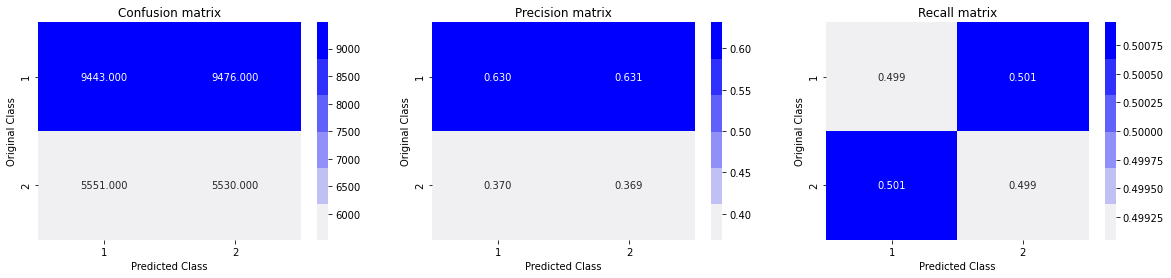

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

## Logistic Regression on Tf-Idf weighted BoW with Hyperparameter tuning :

In [ ]:
data = pd.read_csv('nlp_features_train.csv', encoding = 'latin-1')

y_true = data['is_duplicate']
data.drop(['id','qid1','qid2','is_duplicate'], axis=1, inplace=True)

BX_train, BX_test, by_train, by_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [ ]:
BX_train.head(n=2)

,question1,question2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
293903,how do i get a supply chain internship,what are some supply chain risks,0.666644,0.499988,0.000000,0.000000,0.333328,0.249997,0.0,0.0,2.0,7.0,57,51,57,61,0.411765
215856,how do i earn from quora,how can i make money from quora,0.499975,0.333322,0.749981,0.749981,0.666656,0.571420,1.0,1.0,1.0,6.5,80,69,73,68,0.461538


BX_train & BX_test contains advanced features extracted from text from column 3 inamely "cwc_min" onwards while column 1 & 2 contains question 1 labeled as "question1" & question 2 labeled as "question2" respectively.

In [ ]:
tf_idf_vect_q1 = TfidfVectorizer(ngram_range=(1,2), min_df=10, encoding = 'latin-1', decode_error = 'ignore')
tf_idf_vect_q2 = TfidfVectorizer(ngram_range=(1,2), min_df=10, encoding = 'latin-1', decode_error = 'ignore')

tr_q1 = tf_idf_vect_q1.fit_transform(BX_train['question1'].values.astype('U'))
tr_q2 = tf_idf_vect_q2.fit_transform(BX_train['question2'].values.astype('U'))

te_q1 = tf_idf_vect_q1.transform(BX_test['question1'].values.astype('U'))
te_q2 = tf_idf_vect_q2.transform(BX_test['question2'].values.astype('U'))

XTr = BX_train.iloc[:,2:]
XS_train = sparse.hstack((tr_q1,tr_q2,XTr)).tocsr()

XTe = BX_test.iloc[:,2:]
XS_test = sparse.hstack((te_q1,te_q2,XTe)).tocsr()


XTr contains only the advanced features starting from column 3 (namely "cwc_min")of BX_train

In [ ]:
XTr.head(n=2)

For values of alpha =  1e-05 The log loss is: 0.4521291402478337
For values of alpha =  0.0001 The log loss is: 0.4576413694042885
For values of alpha =  0.001 The log loss is: 0.49340320136094995
For values of alpha =  0.01 The log loss is: 0.5459820974091831
For values of alpha =  0.1 The log loss is: 0.576032552996798
For values of alpha =  1 The log loss is: 0.5862965440157171
For values of alpha =  10 The log loss is: 0.58547824295587


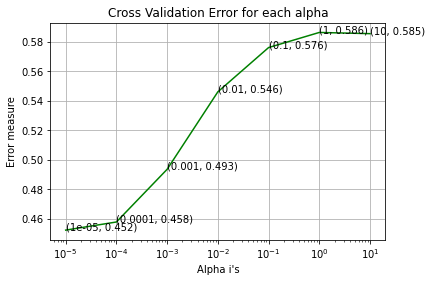

For values of best alpha =  1e-05 The train log loss is: 0.4395102779281827
For values of best alpha =  1e-05 The test log loss is: 0.4525744432064936
Total number of data points : 121287


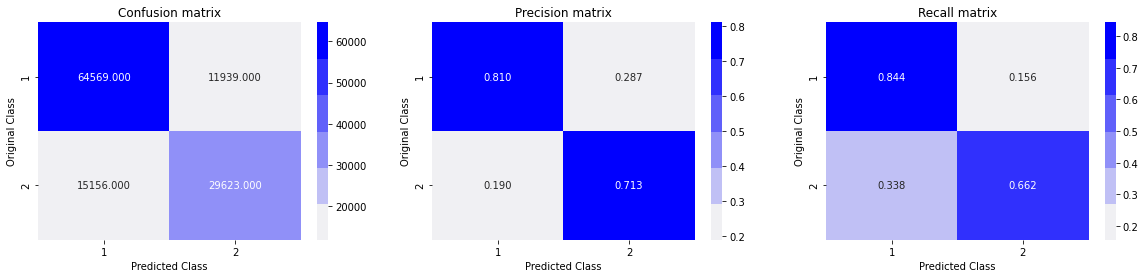

For values of alpha =  1e-05 The log loss is: 0.4521291402478337
For values of alpha =  0.0001 The log loss is: 0.4576413694042885
For values of alpha =  0.001 The log loss is: 0.49340320136094995
For values of alpha =  0.01 The log loss is: 0.5459820974091831
For values of alpha =  0.1 The log loss is: 0.576032552996798
For values of alpha =  1 The log loss is: 0.5862965440157171
For values of alpha =  10 The log loss is: 0.58547824295587


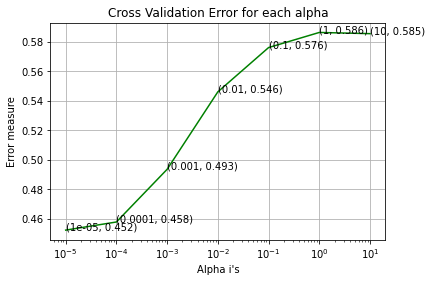

For values of best alpha =  1e-05 The train log loss is: 0.4395102779281827
For values of best alpha =  1e-05 The test log loss is: 0.4525744432064936
Total number of data points : 121287


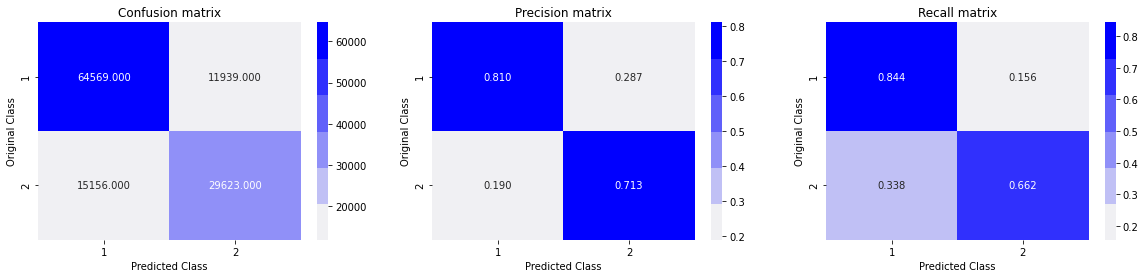

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] 

# hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42, class_weight= "balanced")
    clf.fit(XS_train, by_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(XS_train, by_train)
    predict_y = sig_clf.predict_proba(XS_test)
    log_error_array.append(log_loss(by_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(by_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
ax.set_xscale('log')
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(XS_train, by_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(XS_train, by_train)

predict_y = sig_clf.predict_proba(XS_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(by_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(XS_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(by_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(by_test, predicted_y)

## Linear SVM's on Tf-Idf weighted BoW with Hyperparameter tuning :

For values of alpha =  1e-05 The log loss is: 0.47879174198463154
For values of alpha =  0.0001 The log loss is: 0.5136675210207914
For values of alpha =  0.001 The log loss is: 0.5373613019863634
For values of alpha =  0.01 The log loss is: 0.5594784935224821
For values of alpha =  0.1 The log loss is: 0.5861631925861202
For values of alpha =  1 The log loss is: 0.5821677564966035
For values of alpha =  10 The log loss is: 0.6585278256322702


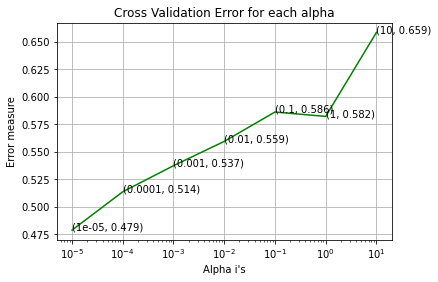

For values of best alpha =  1e-05 The train log loss is: 0.4766691596063021
For values of best alpha =  1e-05 The test log loss is: 0.48200806295004883
Total number of data points : 121287


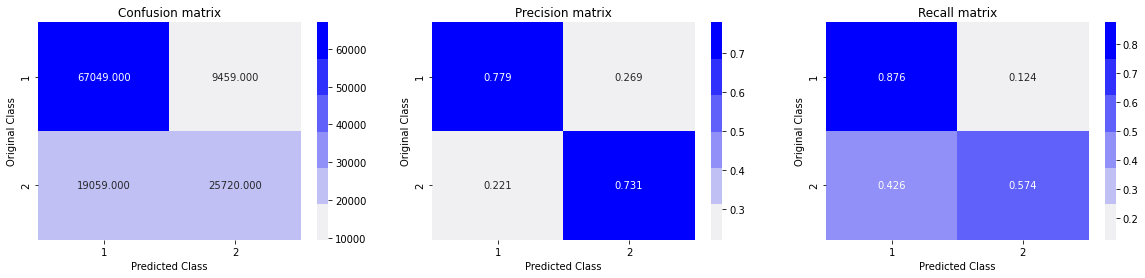

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42, class_weight = "balanced")
    clf.fit(XS_train, by_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(XS_train, by_train)
    predict_y = sig_clf.predict_proba(XS_test)
    log_error_array.append(log_loss(by_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(by_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
ax.set_xscale('log')
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(XS_train, by_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(XS_train, by_train)

predict_y = sig_clf.predict_proba(XS_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(by_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(XS_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(by_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(by_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [ ]:
os.chdir("/content/drive/My Drive/AAIC/")
!ls

 amazon1.png				    database.sqlite
 amazon3.png				    Ensemble.html
 amazon4.png				    Ensemble.ipynb
'Amazon Fine Food Reviews Analysis.ipynb'  'F:\GM1.dot'
 amazon.png				    final_features_test_data.csv
 Amz30kTest				    final_features_train_data.csv
 amz4.png				    google_w2v_for_amazon.pkl
 Amz70kTrain				    Quora
 Corrected_DT.html			    Quora_Assignment.html
 Corrected_DT.ipynb			    Quora_Assignment.ipynb
 corrected_dt.py			    word_cloud
 data


In [ ]:
train_data = pd.read_csv("final_features_train_data.csv", encoding = 'latin-1')
test_data = pd.read_csv("final_features_test_data.csv", encoding = 'latin-1')

In [ ]:
y_train = train_data['is_duplicate']; y_test = test_data['is_duplicate']; 
train_data.drop(['id','is_duplicate', 'Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['id','is_duplicate', 'Unnamed: 0'], axis=1, inplace=True)

**Hyperparameter tuning -**

In [ ]:
import xgboost as xgb
#params = {}
#params['objective'] = 'binary:logistic'
#params['eval_metric'] = 'logloss'
#params['eta'] = 0.02
#params['max_depth'] = 4

#d_train = xgb.DMatrix(X_train, label=y_train)
#d_test = xgb.DMatrix(X_test, label=y_test)

#watchlist = [(d_train, 'train'), (d_test, 'valid')]

#bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

#xgdmat = xgb.DMatrix(X_train,y_train)
#predict_y = bst.predict(d_test)
#print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = xgb.XGBClassifier(n_jobs=-1)
param_distributions = {'learning_rate': uniform(loc=0, scale=0.2), 'max_depth': [3,5,7],\
                       'n_estimators': [100, 300, 500, 700]}

RandModel = RandomizedSearchCV(clf, param_distributions = param_distributions, n_iter = 20,\
                               scoring = "neg_log_loss", n_jobs = -1, cv = 2, return_train_score=True)

RandModel.fit(train_data, y_train)

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
         

***Validating results of Random Search***

In [ ]:
diffs = abs(abs(RandModel.cv_results_['mean_test_score'])-abs(RandModel.cv_results_['mean_train_score']))
results_dict = dict(zip(list(np.linspace(0,19,20)), diffs))
sorted_diffs=sorted(list(results_dict.values()))

top_10=sorted_diffs[0:9]
 
top_ranks = [list(results_dict.keys())[list(results_dict.values()).index(i)] for i in top_10]
rank_score_dict = dict(zip(list(np.linspace(0,19,20)),list(zip(abs(RandModel.cv_results_['mean_test_score']),abs(RandModel.cv_results_['mean_train_score'])))))

In [ ]:
for count,i in enumerate(top_ranks):
  print("\nTop", count+1,"closest test and train pair is {0:.4f} & {1:.4f}".format(float(rank_score_dict[i][0]),float(rank_score_dict[i][1])),\
        "\n for max depth equal ",\
        RandModel.cv_results_['param_max_depth'][int(i)],\
        ", \n learning rate equals {0:.4f}".format(float(RandModel.cv_results_['param_learning_rate'][int(i)]))\
        ,"\n & no. of estimators equals ",RandModel.cv_results_['param_n_estimators'][int(i)])


Top 1 closest test and train pair is 0.5760 & 0.5728 
 for max depth equal  5 , 
 learning rate equals 0.0035 
 & no. of estimators equals  100

Top 2 closest test and train pair is 0.3617 & 0.3302 
 for max depth equal  3 , 
 learning rate equals 0.0407 
 & no. of estimators equals  300

Top 3 closest test and train pair is 0.3591 & 0.3127 
 for max depth equal  3 , 
 learning rate equals 0.1610 
 & no. of estimators equals  100

Top 4 closest test and train pair is 0.3586 & 0.3108 
 for max depth equal  3 , 
 learning rate equals 0.1659 
 & no. of estimators equals  100

Top 5 closest test and train pair is 0.3578 & 0.3042 
 for max depth equal  3 , 
 learning rate equals 0.1802 
 & no. of estimators equals  100

Top 6 closest test and train pair is 0.3568 & 0.2979 
 for max depth equal  5 , 
 learning rate equals 0.0663 
 & no. of estimators equals  100

Top 7 closest test and train pair is 0.3561 & 0.2956 
 for max depth equal  5 , 
 learning rate equals 0.0139 
 & no. of estimato

Log-loss on test set with 15k observations is  0.31794989199027573
Log-loss on train set with 35k observations is  0.3653690823029095


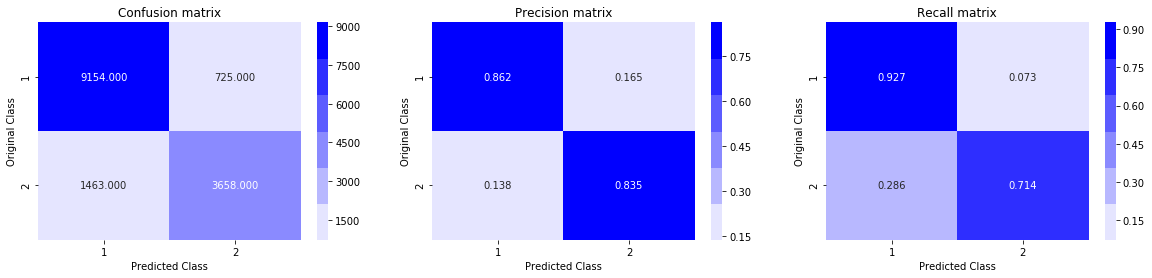

In [ ]:
bst_clf = xgb.XGBClassifier(n_jobs = -1, reg_alpha = 1, learning_rate = 0.04 ,max_depth = 3 ,n_estimators = 300)
bst_clf.fit(test_data, y_test)                      

y_predict = bst_clf.predict_proba(test_data)
y_tr_predict = bst_clf.predict_proba(train_data)

predicted_y =np.array(y_predict>0.5, dtype=int)

print("Log-loss on test set with 15k observations is ",log_loss(y_test, y_predict, labels=bst_clf.classes_, eps=1e-15))
print("Log-loss on train set with 35k observations is ",log_loss(y_train, y_tr_predict, labels=bst_clf.classes_, eps=1e-15))

plot_confusion_matrix(y_test, predicted_y[:,1])

##Results summary -

In [ ]:
x = PrettyTable(["Model","Vectorizer","Regularisation","Train - logloss","Test - logloss"])

x.add_row(["Random Model","-","-","-","0.88"])
x.add_row(["Logistic Regerssion","Tf-Idf W2V + custom features","l2","0.51","0.52"])
x.add_row(["Logistic Regerssion","Tf-Idf BoW + custom features","l2","0.44","0.45"])
x.add_row(["Linear SVM's","Tf-Idf W2V + custom features","l1","0.50","0.52"])
x.add_row(["Linear SVM's","Tf-Idf BoW + custom features","l1","0.48","0.48"])
x.add_row(["Xgboost(GBDT)","Tf-Idf W2V + custom features","l1","0.36","0.32"])

x.align["Variant"] = "l"
x.align["Vectorizer"] = "l"

print("Summary of Results")
print(x)

Summary of Results
+---------------------+------------------------------+----------------+-----------------+----------------+
|        Model        | Vectorizer                   | Regularisation | Train - logloss | Test - logloss |
+---------------------+------------------------------+----------------+-----------------+----------------+
|     Random Model    | -                            |       -        |        -        |      0.88      |
| Logistic Regerssion | Tf-Idf W2V + custom features |       l2       |       0.51      |      0.52      |
| Logistic Regerssion | Tf-Idf BoW + custom features |       l2       |       0.44      |      0.45      |
|     Linear SVM's    | Tf-Idf W2V + custom features |       l1       |       0.50      |      0.52      |
|     Linear SVM's    | Tf-Idf BoW + custom features |       l1       |       0.48      |      0.48      |
|    Xgboost(GBDT)    | Tf-Idf W2V + custom features |       l1       |       0.36      |      0.32      |
+-----------------

Comparitively XGBoost Model shows significant improvement in Train & Test logloss, precision and recall, when compared to Logistic Regression with l2 regularisation and Linear SVM's with L1 regularisation.

Also other observation made was Tfidf features certainly add more value to all the models than Word2Vecs which was also inferred during exploratory data analysis stage.

